In [1]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
from statistics import stdev
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import itertools

In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Creating features from audio files

In [3]:
header = 'filename rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [4]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [5]:
Instruments = 'flu pia tru org gac voi'.split()
for i in Instruments:
    for filename in os.listdir(f'D:/PGDBA/ISI/CDS/Project/IRMAS-TrainingData/{i}'):
        songname = f'D:/PGDBA/ISI/CDS/Project/IRMAS-TrainingData/{i}/{filename}'
        y, sr = librosa.load(songname, sr =44100)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {i}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [3]:
df = pd.read_csv('data.csv')
df.head()

,filename,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,008__[flu][nod][cla]0393__1.wav,0.041481,1312.170004,1899.675233,1606.260557,0.042741,-380.747925,195.180801,0.991318,-11.974566,...,-7.563637,4.926962,-6.573174,-9.922132,-16.699823,-9.281891,-2.828896,-2.138995,2.012392,flu
1,008__[flu][nod][cla]0393__2.wav,0.038519,1111.202613,1564.692193,1589.300042,0.033182,-392.709167,214.983414,-7.120410,-12.270212,...,-9.084672,-4.674106,-13.573331,-9.217548,-11.809932,-2.927299,1.620479,0.234051,0.944750,flu
2,008__[flu][nod][cla]0393__3.wav,0.069043,1345.465834,1830.713470,1726.064981,0.048355,-326.334808,199.996475,-6.926570,-18.764690,...,-4.147692,4.895569,-12.302687,-13.379917,-13.427518,-1.894696,-0.524609,-3.942640,1.798638,flu
3,009__[flu][nod][cou_fol]0410__1.wav,0.110917,3714.597457,2891.937598,6495.544764,0.083345,-278.512115,35.289692,-115.851624,12.160295,...,-10.768554,21.621355,19.596895,2.297276,-0.899492,-6.461621,-7.991356,-0.795038,5.366362,flu
4,009__[flu][nod][cou_fol]0410__2.wav,0.135875,3558.964511,2848.067932,6224.592219,0.082947,-271.450378,39.022335,-108.615738,6.208186,...,-1.004521,17.824242,6.307743,-5.549890,1.700688,1.134401,-4.153898,-1.111974,4.305286,flu


In [4]:
df.shape
features = df[df.columns[2:26]]

# PCA Analysis

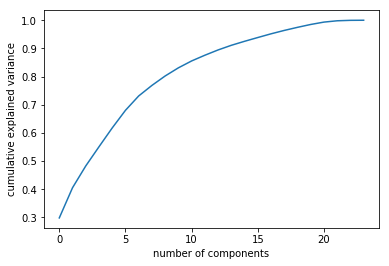

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
X = scale(features)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [6]:
# Dropping unneccesary columns
df = df.drop(['filename'],axis=1)

In [7]:
df1 = shuffle(df)

In [46]:
df1

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
1236,0.066471,1592.764054,1433.621610,2658.477618,0.058405,-312.215454,203.117676,-63.703320,8.811184,11.056579,...,5.632961,5.043970,-8.536657,-10.194458,-6.992977,-3.643600,-2.325147,-5.421971,-2.604491,tru
3632,0.123026,3317.253958,3949.325612,8002.453283,0.060816,-141.789154,128.604553,-16.256771,54.118061,-9.086561,...,-0.588439,-1.352010,0.261654,-1.000463,-2.296324,-2.482624,2.647427,-3.362985,0.707062,voi
1129,0.220952,3499.321525,3757.904446,7548.177523,0.085387,-58.244534,124.018700,-43.422699,41.143303,-16.278927,...,9.589932,-6.786397,9.383644,2.707143,8.404344,3.516591,2.262648,1.360628,1.291275,pia
3512,0.089578,1738.908254,2523.993028,3419.788587,0.030209,-240.318771,174.189697,-23.716040,41.815964,0.272700,...,7.308175,-6.306120,2.692686,2.210188,-5.375428,0.405832,-3.034472,-0.408285,-4.710419,voi
3338,0.203515,2338.995042,2630.177336,4758.006493,0.055636,-111.145844,165.165314,-47.970024,50.274231,-8.835526,...,4.194554,3.461226,-5.432590,0.049973,-1.246397,-2.209348,-2.262831,0.844430,-6.733768,voi
1269,0.069759,1159.754603,1059.065773,1870.063081,0.040754,-378.166107,202.844467,-30.363167,-29.456583,2.352147,...,-27.187744,-31.605562,-15.768921,5.549631,9.635245,2.095481,-0.407500,7.976525,16.391981,tru
2713,0.056014,1351.387859,2459.924295,1878.293919,0.026301,-326.299469,186.228165,13.846089,7.140451,-0.789824,...,-1.678697,-6.465110,-1.443457,-2.017873,-1.695404,-5.291640,-15.145907,-9.943095,-8.188836,gac
1280,0.085153,1994.621872,1864.194326,3449.220070,0.073025,-239.516556,184.892914,-71.329102,30.267933,7.967874,...,-2.439720,-3.444089,-5.448969,0.351650,2.825214,5.066955,2.300638,1.926960,-3.184302,tru
1410,0.042429,920.724649,967.027238,1635.193201,0.023160,-371.388794,263.578186,-20.729616,-18.405396,24.287125,...,-0.686651,-5.510337,4.010484,0.717366,-3.451597,4.480436,3.608277,1.912358,2.936848,tru
2672,0.040807,721.040117,1061.640381,1065.020587,0.019399,-416.976959,206.125610,33.406258,-6.960793,4.179320,...,-7.908988,-10.368075,-13.507225,-15.187915,-14.818480,-9.045842,-2.010890,-0.846752,-0.099273,gac


In [47]:
instru_list = df1.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [49]:
y

array([4, 5, 3, ..., 2, 0, 5])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Supervised Algorithms

### SVM

In [62]:
svclassifier = SVC(kernel='rbf', C = 10.0, gamma=0.1)

In [63]:
svclassifier.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Save the model

In [52]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pickle_model_2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svclassifier, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_train, y_train)
print("Test score: {0:.2f} %".format(100 * score))
#Ypredict = pickle_model.predict(Xtest)

Test score: 99.90 %


In [64]:
predicted_labels = svclassifier.predict(X_test)

In [65]:
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, predicted_labels))

Recall:  [0.62105263 0.84962406 0.81300813 0.77419355 0.81081081 0.77777778]
Precision:  [0.62105263 0.7739726  0.71942446 0.85714286 0.8411215  0.83216783]
F1-Score:  [0.62105263 0.81003584 0.76335878 0.81355932 0.82568807 0.80405405]
Accuracy: 0.78  , 601
Number of samples: 770
[[ 59   8   9   7   6   6]
 [  5 113   3   6   1   5]
 [  9   5 100   2   2   5]
 [  4  11   8 120   6   6]
 [ 10   1   6   2  90   2]
 [  8   8  13   3   2 119]]


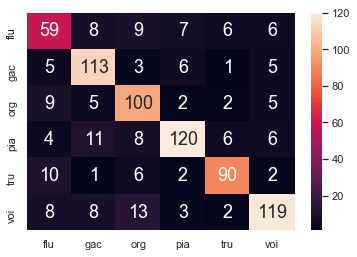

In [66]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted_labels),index=["flu", "gac", "org", "pia", "tru", "voi"], columns=["flu", "gac", "org", "pia", "tru", "voi"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()

### LOgistic Regression

In [67]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',max_iter = 2000).fit(X_train, y_train)

In [68]:
predicted_labels = clf.predict(X_test)

In [69]:
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, predicted_labels))

Recall:  [0.26315789 0.58646617 0.53658537 0.69677419 0.52252252 0.59477124]
Precision:  [0.47169811 0.58208955 0.44594595 0.62790698 0.71604938 0.5       ]
F1-Score:  [0.33783784 0.58426966 0.48708487 0.66055046 0.60416667 0.54328358]
Accuracy: 0.55  , 426
Number of samples: 770
[[ 25   9  22  17   4  18]
 [  4  78  13  16   5  17]
 [  3  10  66  12   5  27]
 [  8  12  12 108   1  14]
 [ 10   2  11  15  58  15]
 [  3  23  24   4   8  91]]


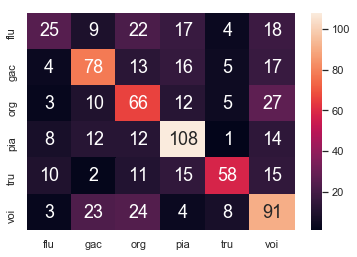

In [70]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted_labels),index=["flu", "gac", "org", "pia", "tru", "voi"], columns=["flu", "gac", "org", "pia", "tru", "voi"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()

### LGBM

In [71]:
from lightgbm import LGBMClassifier
m=LGBMClassifier()
m.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [72]:
predicted_labels = m.predict(X_test)

In [73]:
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, predicted_labels))

Recall:  [0.4        0.69924812 0.74796748 0.69677419 0.67567568 0.74509804]
Precision:  [0.61290323 0.67391304 0.57142857 0.77142857 0.79787234 0.65142857]
F1-Score:  [0.48407643 0.68634686 0.64788732 0.73220339 0.73170732 0.69512195]
Accuracy: 0.68  , 520
Number of samples: 770
[[ 38  11  17  11   3  15]
 [  5  93  11  12   1  11]
 [  6   5  92   1   5  14]
 [  5  11  17 108   4  10]
 [  7   2   9   7  75  11]
 [  1  16  15   1   6 114]]


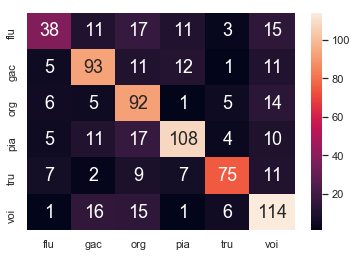

In [74]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted_labels),index=["flu", "gac", "org", "pia", "tru", "voi"], columns=["flu", "gac", "org", "pia", "tru", "voi"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()

### RAndomForest

In [75]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators = 150, random_state = 7000)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=7000, verbose=0,
            warm_start=False)

In [76]:
predicted_labels = clf.predict(X_test)

In [77]:
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, predicted_labels))

Recall:  [0.36842105 0.77443609 0.70731707 0.70967742 0.6036036  0.76470588]
Precision:  [0.66037736 0.74100719 0.54037267 0.73333333 0.79761905 0.63934426]
F1-Score:  [0.47297297 0.75735294 0.61267606 0.72131148 0.68717949 0.69642857]
Accuracy: 0.67  , 519
Number of samples: 770
[[ 35  10  16  14   2  18]
 [  4 103   9   4   1  12]
 [  2   7  87   6   4  17]
 [  4  10  19 110   4   8]
 [  6   1  12  14  67  11]
 [  2   8  18   2   6 117]]


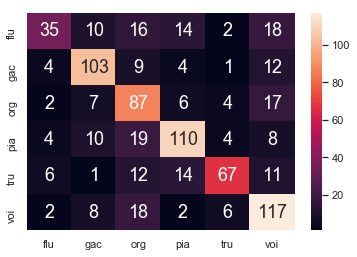

In [78]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted_labels),index=["flu", "gac", "org", "pia", "tru", "voi"], columns=["flu", "gac", "org", "pia", "tru", "voi"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()

### Decision Tree

In [79]:
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X_train, y_train)
#Predict Output
predicted_labels = model.predict(X_test)

In [80]:
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])
print(confusion_matrix(y_test, predicted_labels))

Recall:  [0.32631579 0.57142857 0.5203252  0.50967742 0.5045045  0.41830065]
Precision:  [0.35632184 0.56296296 0.46376812 0.46470588 0.47863248 0.5203252 ]
F1-Score:  [0.34065934 0.56716418 0.49042146 0.48615385 0.49122807 0.46376812]
Accuracy: 0.48  , 370
Number of samples: 770
[[31  8 19 15  9 13]
 [ 7 76  6 22 11 11]
 [11  6 64 13  9 20]
 [17 21 18 79 16  4]
 [ 7 10  9 18 56 11]
 [14 14 22 23 16 64]]


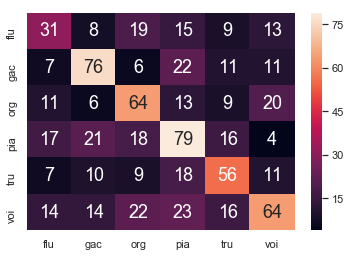

In [81]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted_labels),index=["flu", "gac", "org", "pia", "tru", "voi"], columns=["flu", "gac", "org", "pia", "tru", "voi"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()

### Xgboost

In [82]:
import xgboost as xgb
XGBvlassifier = xgb.XGBClassifier(n_estimators=300, max_depth= 70, learning_rate=0.1)

XGBvlassifier.fit(X_train, y_train)
predicted_labels = XGBvlassifier.predict(X_test)
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])

confusion_matrix(y_test, predicted_labels)

Recall:  [0.45263158 0.7518797  0.69918699 0.69677419 0.6036036  0.77777778]
Precision:  [0.66153846 0.68493151 0.59722222 0.71523179 0.74444444 0.68390805]
F1-Score:  [0.5375     0.71684588 0.64419476 0.70588235 0.66666667 0.72782875]
Accuracy: 0.68  , 523
Number of samples: 770


array([[ 43,   9,  13,  12,   5,  13],
       [  4, 100,  11,   9,   0,   9],
       [  3,   7,  86,   8,   7,  12],
       [  6,  13,  13, 108,   5,  10],
       [  8,   5,   9,  11,  67,  11],
       [  1,  12,  12,   3,   6, 119]], dtype=int64)

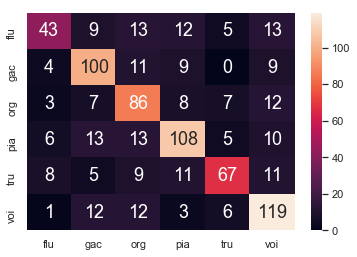

In [83]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt  
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted_labels),index=["flu", "gac", "org", "pia", "tru", "voi"], columns=["flu", "gac", "org", "pia", "tru", "voi"])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 18},fmt='g')# font size

plt.show()

# Unsupervised KMEans

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

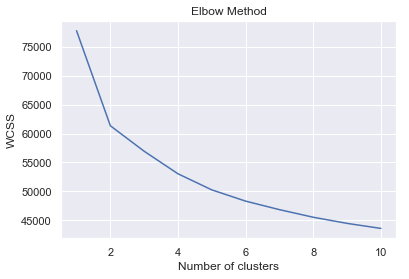

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)

imp = pd.DataFrame()
imp['Prediction'] = pred_y

imp['Data'] = y_train

imp.to_csv('D:/PGDBA/ISI/CDS/Project/Cluster.csv')